# Liabrary

In [5]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt

#Machine Learning
import statsmodels.api as sm

# Dataframe

In [6]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\Admissions Data.csv")

In [7]:
df

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


# Observation

Depedent Column - Admitted
Independent Column - Marks,Gender
Continuous Column - Marks
Catagory Column - Admitted,Gender

# Supervised Classification

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Marks     168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [9]:
df.isnull().sum()

Marks       0
Admitted    0
Gender      0
dtype: int64

Continuous column - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

# Hypothesis Tesing

1.Central Limit Theoram :

Population Mean:  1695.2738095238096 sample Mean 1693.408

2. 1 Tailed Test

H0 accepted 9 times , H0 rejected 16 times
H0 is rejected, Ha is accepted, There is a significant effect

# Central Limit Theoram

In [10]:
pop=df.Marks.values
pop_mean=pop.mean()
sample_size=30
sample_mean=[]
for i in range(25):
    sample=np.random.choice(pop,sample_size)
    sample_mean.append(sample.mean())
np.mean(sample_mean)
print("Population Mean: ",pop_mean,"sample Mean",np.mean(sample_mean))

Population Mean:  1695.2738095238096 sample Mean 1705.1133333333335


# 1 Tailed Test

In [11]:
H0_accepted = 0
H0_rejected = 0
for i in range(25):
  sample = df.Marks.sample(frac=0.05)
  t_test, p_value = stats.ttest_1samp(sample,df.Marks.mean())
  if p_value > 0.5:
    H0_accepted += 1
  else:
    H0_rejected += 1

print(f"H0 accepted {H0_accepted} times , H0 rejected {H0_rejected} times")
if H0_accepted>H0_rejected:
  print("H0 accepted,Ha rejected, no significant effect")
else:
  print("H0 is rejected, Ha is accepted, There is a significant effect")

H0 accepted 13 times , H0 rejected 12 times
H0 accepted,Ha rejected, no significant effect


# Chi Square Test

In [12]:
data=pd.crosstab(df.Admitted,df.Gender)
observed_values=data.values
chi2_stat,p_value,_,_=stats.chi2_contingency(observed_values)
if p_value > 0.05:
  print("H0 is accepted, There is no relationship between two columns we're comparing")
else:
  print("H0 is rejected, There is a relationship between two columns we're comparing")

H0 is rejected, There is a relationship between two columns we're comparing


# Anova 

In [13]:
grp=df.Admitted.unique()
data={}
for i in grp:
    data[i]=df.Marks[df.Admitted==i]
f_value,p_value=stats.f_oneway(*[data[i] for i in grp])
if p_value > 0.05:
  print("H0 is accepted, There is a relationship between two columns we're comparing")
else:
  print("H0 is rejected, There is no relationship between two columns we're comparing")

H0 is rejected, There is no relationship between two columns we're comparing


In [14]:
grp=df.Gender.unique()
data={}
for i in grp:
    data[i]=df.Marks[df.Gender==i]
f_value,p_value=stats.f_oneway(*[data[i] for i in grp])
if p_value>0.05:
    print("H0 is accepted,There is a relationship between two columns we're comparing")
else:
    print("H0is rejected, There is no reletionship between two columns we're comparing")

H0is rejected, There is no reletionship between two columns we're comparing


# Data Visualization

In [15]:
import plotly.express as px
from plotly.offline import plot

fig = px.sunburst(df,path=['Gender', 'Admitted'],values='Marks')
plot(fig, include_plotlyjs='cdn', output_type='div')

'<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script charset="utf-8" src="https://cdn.plot.ly/plotly-2.30.0.min.js"></script>                <div id="d7a93174-2142-427d-b760-152e6fba59ec" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("d7a93174-2142-427d-b760-152e6fba59ec")) {                    Plotly.newPlot(                        "d7a93174-2142-427d-b760-152e6fba59ec",                        [{"branchvalues":"total","domain":{"x":[0.0,1.0],"y":[0.0,1.0]},"hovertemplate":"labels=%{label}\\u003cbr\\u003eMarks=%{value}\\u003cbr\\u003eparent=%{parent}\\u003cbr\\u003eid=%{id}\\u003cextra\\u003e\\u003c\\u002fextra\\u003e","ids":["Female\\u002fNo","Male\\u002fNo","Female\\u002fYes","Male\\u002fYes","Female","M

# Pre Processing

In [16]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df["Admitted"]=df["Admitted"].replace({"Yes":1,"No":0})
df["Gender"]=df["Gender"].replace({"Male":17,"Female":18})
df

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_29764\741520998.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_29764\741520998.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Marks,Admitted,Gender
0,1363,0,17
1,1792,1,18
2,1954,1,18
3,1653,0,17
4,1593,0,17
...,...,...,...
163,1722,1,18
164,1750,1,17
165,1555,0,17
166,1524,0,17


# Machine Learning

Supervised Classification - Logistic regression

In [18]:
df.head()

,Marks,Admitted,Gender
0,1363,0,17
1,1792,1,18
2,1954,1,18
3,1653,0,17
4,1593,0,17


In [19]:
y=df["Admitted"]
x1=df[["Marks","Gender"]]
x=sm.add_constant(x1)
result=sm.Logit(y,x).fit()
result.pred_table()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


array([[69.,  5.],
       [ 4., 90.]])

In [20]:
cm_df=pd.DataFrame(result.pred_table())
cm=np.array(cm_df)
acc=(cm[0,0]+cm[1,1])/cm.sum()
print(acc*100)

94.64285714285714


In [21]:
cm_df=pd.DataFrame(result.pred_table())
cm_df.columns=["predicted 0","predicted 1"]
cm_df=cm_df.rename(index={0:"actual 0",1:"actual 1"})
cm_df

,predicted 0,predicted 1
actual 0,69.0,5.0
actual 1,4.0,90.0


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.8249
Time:                        14:44:09   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.4120     23.736     -4.272      0.000    -147.934     -54.890
Marks          0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Admitted', axis=1)
y = df['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.95
F1 Score: 0.9743589743589743


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Optionally, evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy with best model: ", test_accuracy)


Best parameters found:  {'max_depth': None, 'n_estimators': 50}
Best accuracy score:  0.9252525252525253
Test set accuracy with best model:  0.9705882352941176


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[14  0]
 [ 1 19]]


In [33]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



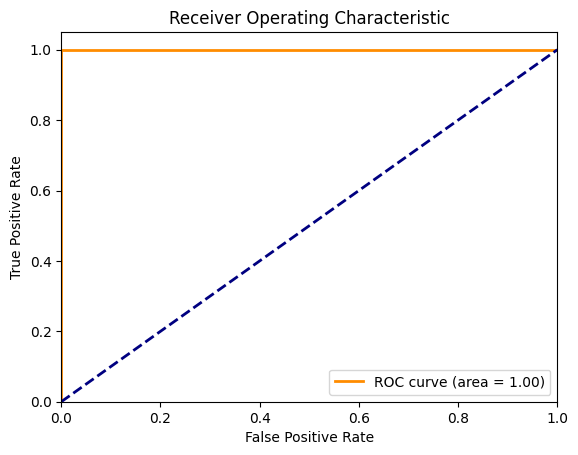

In [34]:
from sklearn.metrics import roc_curve, auc

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


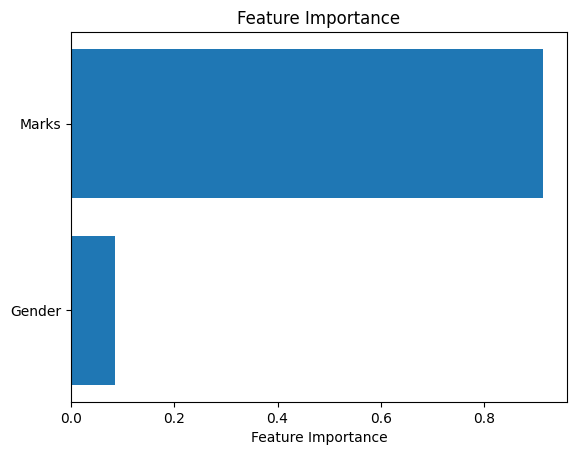

In [35]:
importances = best_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else range(len(importances))

sorted_indices = importances.argsort()
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


In [36]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

print("Best parameters found: ", randomized_search.best_params_)
print("Best accuracy score: ", randomized_search.best_score_)


c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.



Best parameters found:  {'n_estimators': 50, 'max_depth': None}
Best accuracy score:  0.9252525252525253


In [37]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores: ", cross_val_scores)
print("Mean Cross-Validation Score: ", cross_val_scores.mean())


Cross-Validation Scores:  [1.         0.97058824 0.85294118 0.96969697 0.96969697]
Mean Cross-Validation Score:  0.9525846702317292


In [38]:
import joblib

joblib.dump(best_model, 'best_model.pkl')
# To load the model
# best_model = joblib.load('best_model.pkl')


['best_model.pkl']

In [1]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (example with Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')


Accuracy of Random Forest Classifier: 1.00


In [2]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (example with Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Compute average accuracy
avg_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Cross-Validated Accuracy: {avg_accuracy:.2f}')


Average Cross-Validated Accuracy: 0.96


Feature ranking:
1. Feature 2 (petal length (cm)): 0.4361295069034437
2. Feature 3 (petal width (cm)): 0.43606478004168353
3. Feature 0 (sepal length (cm)): 0.10612761987750428
4. Feature 1 (sepal width (cm)): 0.02167809317736852


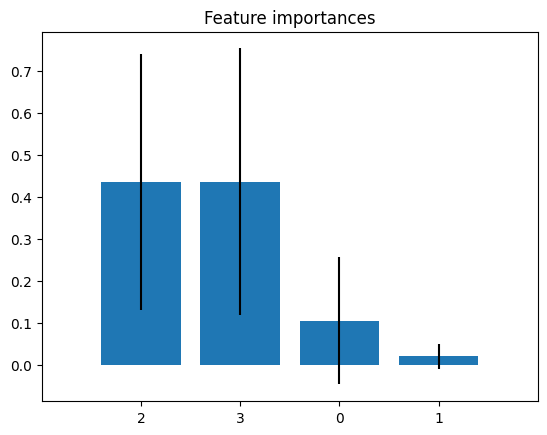

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset (example with Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({feature_names[indices[f]]}): {importances[indices[f]]}")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (example with Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find best parameters
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters found:")
print(grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.2f}")

# Evaluate model on test set with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set with Best Parameters: {accuracy:.2f}')


Best Parameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.96
Accuracy on Test Set with Best Parameters: 1.00
